In [25]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np; np.random.seed(136)
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import faculty.datasets as datasets
from pandas.api.types import CategoricalDtype
import matplotlib.ticker as mtick
import statsmodels.api as sm
import plotly.graph_objects as go
from pandas import Series, DataFrame
import os
from functools import reduce



In [26]:
#import market value dataset and all football 18
market_value_all = pd.read_csv('/project/market_value_all.csv', index_col=0)
all_football_18 = pd.read_csv('/project/all_football_18.csv', index_col=0)


In [27]:
market_value_all.head()
all_football_18.head()

,country,confederation,squad_size,avg_age,market_value_in_euros,market_value_digits,avg_market_value_of_players_in_mill_euros
0,Argentina,CONMEBOL,36,25.9,747.50 million,747,20.75
1,Australia,AFC,23,25.6,32.85 million,32,1.39
2,Belgium,UEFA,23,27.8,419.00 million,419,18.22
3,Brazil,CONMEBOL,23,26.5,870.50 million,870,37.83
4,Colombia,CONMEBOL,26,28.5,282.95 million,282,10.85


,country_name,Final_positional_ranking,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,...,keyPassShort,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
0,Argentina,16,6,13.8,11,0,61.1,85.0,4.5,13.5,...,8.8,38%,27%,35%,19%,49%,32%,27%,49%,24%
1,Australia,25,2,11.0,7,0,50.9,83.7,2.3,11.0,...,6.3,35%,20%,45%,27%,47%,25%,9%,79%,12%
2,Belgium,3,16,15.1,11,0,52.1,86.3,5.7,13.3,...,10.6,34%,26%,40%,27%,47%,26%,26%,56%,18%
3,Brazil,5,8,20.8,7,0,56.8,87.9,8.0,14.8,...,13.0,43%,29%,29%,25%,44%,31%,28%,60%,13%
4,Colombia,10,6,9.8,9,1,50.2,79.9,3.3,7.8,...,5.0,33%,22%,45%,29%,48%,23%,7%,66%,27%


In [28]:
df_top_goals = all_football_18.nlargest(10,'goal')
df_top_goals = df_top_goals.sort_values("goal", axis=0, ascending=False)
df_top_goals

,country_name,Final_positional_ranking,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,...,keyPassShort,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
2,Belgium,3,16,15.1,11,0,52.1,86.3,5.7,13.3,...,10.6,34%,26%,40%,27%,47%,26%,26%,56%,18%
6,Croatia,2,14,16.1,15,0,55.4,81.2,4.1,12.0,...,7.4,43%,23%,34%,26%,47%,27%,23%,64%,13%
10,France,1,14,11.6,12,0,49.6,81.5,4.1,11.0,...,7.4,36%,21%,42%,27%,47%,26%,17%,60%,23%
9,England,4,12,13.4,8,0,53.5,85.3,4.1,10.0,...,6.6,38%,23%,39%,22%,49%,30%,11%,73%,16%
22,Russia,7,11,9.6,6,1,39.5,71.0,3.4,7.4,...,5.4,36%,22%,43%,27%,47%,27%,16%,64%,21%
3,Brazil,5,8,20.8,7,0,56.8,87.9,8.0,14.8,...,13.0,43%,29%,29%,25%,44%,31%,28%,60%,13%
27,Spain,12,7,18.0,2,0,69.2,91.0,6.3,14.5,...,8.5,47%,24%,30%,19%,46%,35%,12%,73%,15%
31,Uruguay,6,7,12.0,3,0,47.7,79.6,4.2,7.8,...,6.2,32%,27%,40%,29%,46%,25%,15%,64%,21%
0,Argentina,16,6,13.8,11,0,61.1,85.0,4.5,13.5,...,8.8,38%,27%,35%,19%,49%,32%,27%,49%,24%
4,Colombia,10,6,9.8,9,1,50.2,79.9,3.3,7.8,...,5.0,33%,22%,45%,29%,48%,23%,7%,66%,27%


In [29]:
countries = list(df_top_goals["country_name"])
top_goals = list(df_top_goals["goal"])

Text(0.5, 0, 'Countries')

Text(0, 0.5, 'No of Goals')

Text(0.5, 1.0, 'Top 10 Countries By Goals')

<BarContainer object of 10 artists>

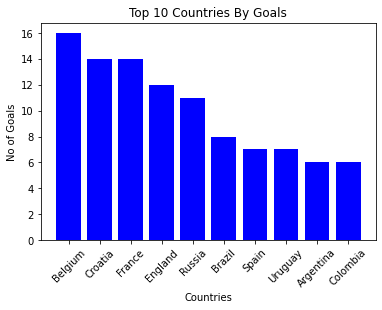

In [30]:
x_pos = [1,2,3,4,5,6,7,8,9,10]
ticks = plt.xticks(x_pos, countries)
plt.xlabel("Countries")
plt.ylabel("No of Goals")
plt.title("Top 10 Countries By Goals")
plt.bar(x_pos, top_goals, color ='b', width = 0.8, align = 'center')
ticks2 = plt.xticks(rotation=45)
plt.savefig('Top 10 Countries By Goals.png')

plt.show()

In [31]:
df_finalists = all_football_18.nsmallest(10,'Final_positional_ranking')

Text(0.5, 1.0, "Top 10 Finalists' Goals")

<BarContainer object of 10 artists>

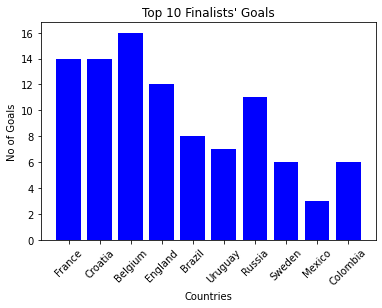

In [32]:
countries = list(df_finalists["country_name"])
winners_goals = list(df_finalists["goal"])

x_pos = [1,2,3,4,5,6,7,8,9,10]
_ = plt.xticks(x_pos, countries)
_ = plt.xlabel("Countries")
_ = plt.ylabel("No of Goals")
plt.title("Top 10 Finalists' Goals")
plt.bar(x_pos, winners_goals, color ='b', width = 0.8, align = 'center')
_ = plt.xticks(rotation=45)
plt.savefig("Top 10 Finalists' Goals")
plt.show()

In [33]:
df_finalists = all_football_18.nsmallest(10,'Final_positional_ranking')
df_finalists

,country_name,Final_positional_ranking,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,...,keyPassShort,left_side,middle_side,right_side,own_third,middle_third,opposition_third,shot_left_side,shot_middle_side,shot_right_side
10,France,1,14,11.6,12,0,49.6,81.5,4.1,11.0,...,7.4,36%,21%,42%,27%,47%,26%,17%,60%,23%
6,Croatia,2,14,16.1,15,0,55.4,81.2,4.1,12.0,...,7.4,43%,23%,34%,26%,47%,27%,23%,64%,13%
2,Belgium,3,16,15.1,11,0,52.1,86.3,5.7,13.3,...,10.6,34%,26%,40%,27%,47%,26%,26%,56%,18%
9,England,4,12,13.4,8,0,53.5,85.3,4.1,10.0,...,6.6,38%,23%,39%,22%,49%,30%,11%,73%,16%
3,Brazil,5,8,20.8,7,0,56.8,87.9,8.0,14.8,...,13.0,43%,29%,29%,25%,44%,31%,28%,60%,13%
31,Uruguay,6,7,12.0,3,0,47.7,79.6,4.2,7.8,...,6.2,32%,27%,40%,29%,46%,25%,15%,64%,21%
22,Russia,7,11,9.6,6,1,39.5,71.0,3.4,7.4,...,5.4,36%,22%,43%,27%,47%,27%,16%,64%,21%
28,Sweden,8,6,11.0,8,0,41.3,71.9,4.0,6.8,...,6.2,35%,29%,36%,32%,44%,24%,16%,75%,9%
15,Mexico,9,3,15.0,9,0,52.3,83.6,3.3,14.0,...,9.8,39%,25%,36%,30%,44%,27%,17%,55%,28%
4,Colombia,10,6,9.8,9,1,50.2,79.9,3.3,7.8,...,5.0,33%,22%,45%,29%,48%,23%,7%,66%,27%


Text(0.5, 0, 'Countries')

Text(0, 0.5, 'No of Goals')

Text(0.5, 1.0, "Top 10 Finalists' Goals")

<BarContainer object of 10 artists>

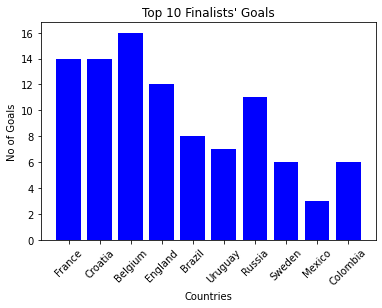

In [34]:
countries = list(df_finalists["country_name"])
winners_goals = list(df_finalists["goal"])

x_pos = [1,2,3,4,5,6,7,8,9,10]
xticks_goals = plt.xticks(x_pos, countries, rotation = 45) 
#creating a variable so that when we plot it, 
#there is no long output above the graph
plt.xlabel("Countries")
plt.ylabel("No of Goals")
plt.title("Top 10 Finalists' Goals")
plt.bar(x_pos, winners_goals, color ='b', width = 0.8, align = 'center')
plt.savefig("Top 10 Finalists' Goals")
plt.show()


Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Possession %')

Text(0.5, 1.0, "Top 10 Finalists' Possession Percentage")

<BarContainer object of 10 artists>

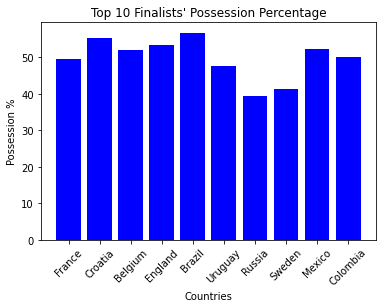

In [35]:
countries = list(df_finalists["country_name"])
winners_possession = list(df_finalists["possession_percentage"])

x_pos = [1,2,3,4,5,6,7,8,9,10]
xticks_possession = plt.xticks(x_pos, countries, rotation=45)
plt.xlabel("Countries")
plt.ylabel("Possession %")
plt.title("Top 10 Finalists' Possession Percentage")
plt.bar(x_pos, winners_possession, color ='b', width = 0.8, align = 'center')
plt.savefig("Top 10 Finalists' Possession Percentage")
plt.show()


Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Key Short Passes')

Text(0.5, 1.0, "Top 10 Finalists' Key Short Passes")

<BarContainer object of 10 artists>

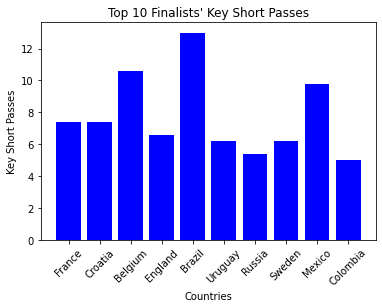

In [36]:
countries = list(df_finalists["country_name"])
winners_keyPassShort = list(df_finalists["keyPassShort"])

x_pos = [1,2,3,4,5,6,7,8,9,10]
xticks_keypassshort = plt.xticks(x_pos, countries, rotation=45)
plt.xlabel("Countries")
plt.ylabel("Key Short Passes")
plt.title("Top 10 Finalists' Key Short Passes")
plt.bar(x_pos, winners_keyPassShort, color ='b', width = 0.8, align = 'center')
plt.savefig("Top 10 Finalists' Key Short Passes")
plt.show()


Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Inaccurate Long Passes')

Text(0.5, 1.0, "Top 10 Finalists' Inaccurate Long Passes")

<BarContainer object of 10 artists>

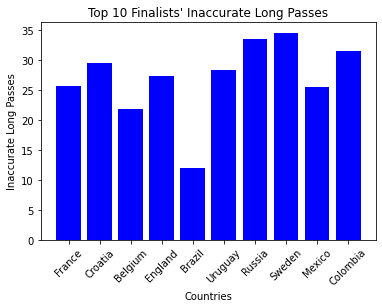

In [37]:
winners_pass_long_inac = list(df_finalists["passLongBallInaccurate"])

x_pos = [1,2,3,4,5,6,7,8,9,10]
xticks_passlongInac = plt.xticks(x_pos, countries, rotation=45)
plt.xlabel("Countries")
plt.ylabel("Inaccurate Long Passes")
plt.title("Top 10 Finalists' Inaccurate Long Passes")
plt.bar(x_pos, winners_pass_long_inac, color ='b', width = 0.8, align = 'center')
plt.savefig("Top 10 Finalists' Inaccurate Long Passes")
plt.show()


Text(0.5, 0, 'Countries')

Text(0, 0.5, 'Accurate Short Passes')

Text(0.5, 1.0, "Top 10 Finalists' Accurate Short Passes")

<BarContainer object of 10 artists>

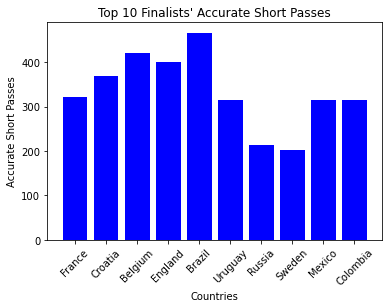

In [38]:
winners_pass_short_ac = list(df_finalists["shortPassAccurate"])

x_pos = [1,2,3,4,5,6,7,8,9,10]
xticks_passShort_ac = plt.xticks(x_pos, countries,rotation=45)
plt.xlabel("Countries")
plt.ylabel("Accurate Short Passes")
plt.title("Top 10 Finalists' Accurate Short Passes")
plt.bar(x_pos, winners_pass_short_ac, color ='b', width = 0.8, align = 'center')
plt.savefig("Top 10 Finalists' Accurate Short Passes")
plt.show()

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

<BarContainer object of 10 artists>

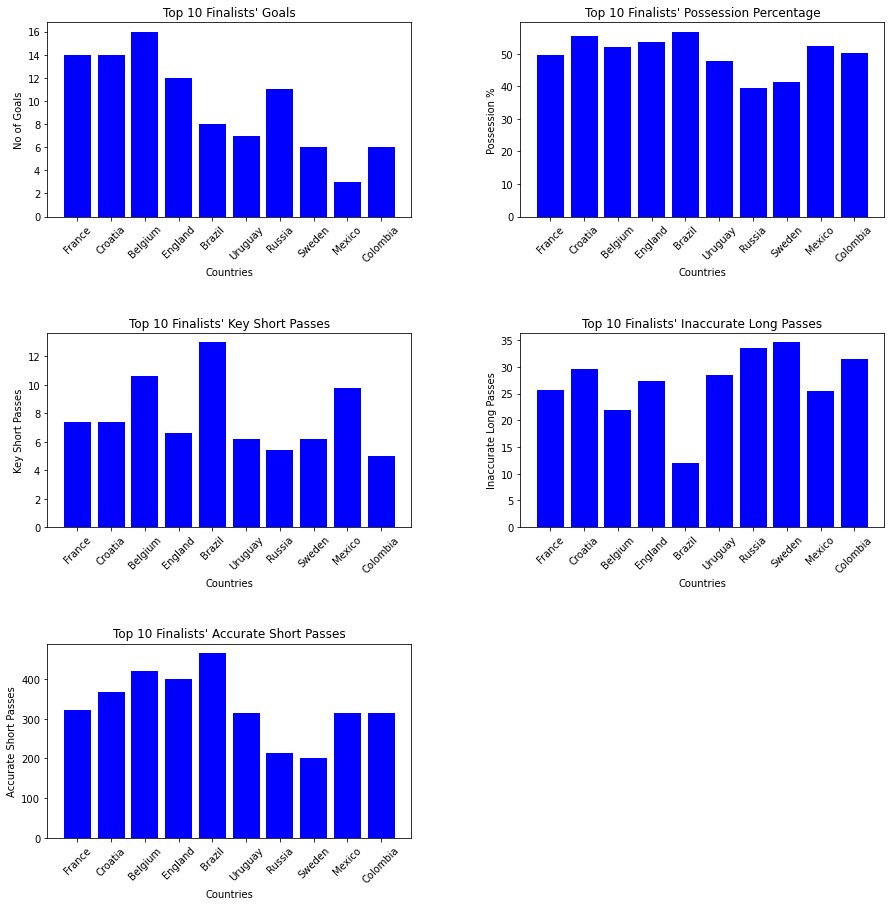

In [39]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3,2,1)
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
#ax6 = fig.add_subplot(3,2,6)

plt.subplots_adjust(wspace=0.3, hspace=0.6)

#Variables which are used by all subplots
x_pos = [1,2,3,4,5,6,7,8,9,10]
countries = list(df_finalists["country_name"])

#ax1 - goals
winners_goals = list(df_finalists["goal"])

ax1.bar(x_pos, winners_goals, color ='b', width = 0.8, align = 'center')
ax1_xlab = 'Countries'
ax1_ylab = 'No of Goals'
ax1_title = ("Top 10 Finalists' Goals")
_ = ax1.set_xlabel(ax1_xlab)
_ = ax1.set_ylabel(ax1_ylab)
ax1_xticks = ax1.set_xticks(x_pos)
ax1_labels = ax1.set_xticklabels(countries, rotation=45)
ax1.title.set_text(ax1_title)


#ax2 - possession 
winners_possession = list(df_finalists["possession_percentage"])

ax2.bar(x_pos, winners_possession, color ='b', width = 0.8, align = 'center')
ax2_xlab = 'Countries'
ax2_ylab = 'Possession %'
ax2_title = ("Top 10 Finalists' Possession Percentage")
_ = ax2.set_xlabel(ax2_xlab)
_ = ax2.set_ylabel(ax2_ylab)
ax2_xticks = ax2.set_xticks(x_pos)
ax2_labels = ax2.set_xticklabels(countries, rotation=45)
ax2.title.set_text(ax2_title)


# #ax3 - stat
# winners_stat = list(df_finalists["stat-value"])

# ax3.bar(x_pos, winners_stat, color ='b', width = 0.8, align = 'center')
# ax3_xlab = 'Countries'
# ax3_ylab = 'Stat Value'
# ax3_title = ("Top 10 Finalists' Stat Value")
# _ = ax3.set_xlabel(ax3_xlab)
# _ = ax3.set_ylabel(ax3_ylab)
# ax3_xticks = ax3.set_xticks(x_pos)
# ax3_labels = ax3.set_xticklabels(countries, rotation=45)
# ax3.title.set_text(ax3_title)


#ax3 - keyPassShort
winners_keyPassShort = list(df_finalists["keyPassShort"])

ax3.bar(x_pos, winners_keyPassShort, color ='b', width = 0.8, align = 'center')
ax3_xlab = 'Countries'
ax3_ylab = 'Key Short Passes'
ax3_title = ("Top 10 Finalists' Key Short Passes")
_ = ax3.set_xlabel(ax3_xlab)
_ = ax3.set_ylabel(ax3_ylab)
ax3_xticks = ax3.set_xticks(x_pos)
ax3_labels = ax3.set_xticklabels(countries, rotation=45)
ax3.title.set_text(ax3_title)



#ax5 - PassLongInaccurate
winners_pass_long_inac = list(df_finalists["passLongBallInaccurate"])

ax4.bar(x_pos, winners_pass_long_inac, color ='b', width = 0.8, align = 'center')
ax4_xlab = 'Countries'
ax4_ylab = "Inaccurate Long Passes"
ax4_title = ("Top 10 Finalists' Inaccurate Long Passes")
_ = ax4.set_xlabel(ax4_xlab)
_ = ax4.set_ylabel(ax4_ylab)
ax4_xticks = ax4.set_xticks(x_pos)
ax4_labels = ax4.set_xticklabels(countries, rotation=45)
ax4.title.set_text(ax4_title)



#ax6 - PassShortAccurate
winners_pass_short_ac = list(df_finalists["shortPassAccurate"])

ax5.bar(x_pos, winners_pass_short_ac, color ='b', width = 0.8, align = 'center')
ax5_xlab = 'Countries'
ax5_ylab = "Accurate Short Passes"
ax5_title = ("Top 10 Finalists' Accurate Short Passes")
_ = ax5.set_xlabel(ax5_xlab)
_ = ax5.set_ylabel(ax5_ylab)
ax5_xticks = ax5.set_xticks(x_pos)
ax5_labels = ax5.set_xticklabels(countries, rotation=45)
ax5.title.set_text(ax5_title)

plt.savefig("Subplots.png")




### Radar Chart for ball possessions


In [40]:
#updating column names 
all_football_18 = all_football_18.rename(columns= {"left_side": "left_side_percent",
                                "middle_side": "middle_side_percent",
                                "right_side":"right_side_percent",
                                "own_third":"own_third_percent",
                                "middle_third":"middle_third_percent",
                                "opposition_third":"opposition_third_percent",
                                "shot_left_side":"shot_left_side_percent",
                                "shot_middle_side":"shot_middle_side_percent",
                                "shot_right_side":"shot_right_side_percent"})

#removing percentage sign to use the numbers
all_football_18 = all_football_18.replace({'%': ''}, regex=True)

all_football_18.head()



,country_name,Final_positional_ranking,goal,shotsPerGame,yellow_card,red_card,possession_percentage,passSuccess_percentage,shotOnTargetPG,dribbleWonPG,...,keyPassShort,left_side_percent,middle_side_percent,right_side_percent,own_third_percent,middle_third_percent,opposition_third_percent,shot_left_side_percent,shot_middle_side_percent,shot_right_side_percent
0,Argentina,16,6,13.8,11,0,61.1,85.0,4.5,13.5,...,8.8,38,27,35,19,49,32,27,49,24
1,Australia,25,2,11.0,7,0,50.9,83.7,2.3,11.0,...,6.3,35,20,45,27,47,25,9,79,12
2,Belgium,3,16,15.1,11,0,52.1,86.3,5.7,13.3,...,10.6,34,26,40,27,47,26,26,56,18
3,Brazil,5,8,20.8,7,0,56.8,87.9,8.0,14.8,...,13.0,43,29,29,25,44,31,28,60,13
4,Colombia,10,6,9.8,9,1,50.2,79.9,3.3,7.8,...,5.0,33,22,45,29,48,23,7,66,27


In [41]:
import statsmodels.api as sm
import plotly.graph_objects as go

spider_chart = all_football_18[["country_name", 
 "Final_positional_ranking",
 'left_side_percent',
 'middle_side_percent',
 'right_side_percent',
 'own_third_percent',
 'middle_third_percent',
 'opposition_third_percent',
 'shot_left_side_percent',
 'shot_middle_side_percent',
 'shot_right_side_percent']]

spider_chart.head()
spider_chart[['left_side_percent',
 'middle_side_percent',
 'right_side_percent',
 'own_third_percent',
 'middle_third_percent',
 'opposition_third_percent',
 'shot_left_side_percent',
 'shot_middle_side_percent',
 'shot_right_side_percent']] = spider_chart[['left_side_percent',
 'middle_side_percent',
 'right_side_percent',
 'own_third_percent',
 'middle_third_percent',
 'opposition_third_percent',
 'shot_left_side_percent',
 'shot_middle_side_percent',
 'shot_right_side_percent']].apply(pd.to_numeric)
spider_chart.info()


,country_name,Final_positional_ranking,left_side_percent,middle_side_percent,right_side_percent,own_third_percent,middle_third_percent,opposition_third_percent,shot_left_side_percent,shot_middle_side_percent,shot_right_side_percent
0,Argentina,16,38,27,35,19,49,32,27,49,24
1,Australia,25,35,20,45,27,47,25,9,79,12
2,Belgium,3,34,26,40,27,47,26,26,56,18
3,Brazil,5,43,29,29,25,44,31,28,60,13
4,Colombia,10,33,22,45,29,48,23,7,66,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   country_name              32 non-null     object
 1   Final_positional_ranking  32 non-null     int64 
 2   left_side_percent         32 non-null     int64 
 3   middle_side_percent       32 non-null     int64 
 4   right_side_percent        32 non-null     int64 
 5   own_third_percent         32 non-null     int64 
 6   middle_third_percent      32 non-null     int64 
 7   opposition_third_percent  32 non-null     int64 
 8   shot_left_side_percent    32 non-null     int64 
 9   shot_middle_side_percent  32 non-null     int64 
 10  shot_right_side_percent   32 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.0+ KB


/opt/anaconda/envs/Python3/lib/python3.8/site-packages/pandas/core/frame.py:3191: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [42]:
#Make categories with 5 distinct bins

bins = [0, 20, 40, 60, 80, 100]

spider_chart["group_left_side"] = pd.cut(spider_chart.left_side_percent, bins)
spider_chart["group_middle_side"] = pd.cut(spider_chart.middle_side_percent, bins)
spider_chart["group_right_side"] = pd.cut(spider_chart.right_side_percent, bins)
spider_chart["group_own_third"] = pd.cut(spider_chart.own_third_percent, bins)
spider_chart["group_middle_third"] = pd.cut(spider_chart.middle_third_percent, bins)
spider_chart["group_opposition_third"] = pd.cut(spider_chart.opposition_third_percent, bins)
spider_chart["group_shot_left_side"] = pd.cut(spider_chart.shot_left_side_percent, bins)
spider_chart["group_shot_middle_side"] = pd.cut(spider_chart.shot_middle_side_percent, bins)
spider_chart["group_shot_right_side"] = pd.cut(spider_chart.shot_right_side_percent, bins)
spider_chart.head()



<ipython-input-42-908a6d6efd6c>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-908a6d6efd6c>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-908a6d6efd6c>:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-42-908a6d6

,country_name,Final_positional_ranking,left_side_percent,middle_side_percent,right_side_percent,own_third_percent,middle_third_percent,opposition_third_percent,shot_left_side_percent,shot_middle_side_percent,shot_right_side_percent,group_left_side,group_middle_side,group_right_side,group_own_third,group_middle_third,group_opposition_third,group_shot_left_side,group_shot_middle_side,group_shot_right_side
0,Argentina,16,38,27,35,19,49,32,27,49,24,"(20, 40]","(20, 40]","(20, 40]","(0, 20]","(40, 60]","(20, 40]","(20, 40]","(40, 60]","(20, 40]"
1,Australia,25,35,20,45,27,47,25,9,79,12,"(20, 40]","(0, 20]","(40, 60]","(20, 40]","(40, 60]","(20, 40]","(0, 20]","(60, 80]","(0, 20]"
2,Belgium,3,34,26,40,27,47,26,26,56,18,"(20, 40]","(20, 40]","(20, 40]","(20, 40]","(40, 60]","(20, 40]","(20, 40]","(40, 60]","(0, 20]"
3,Brazil,5,43,29,29,25,44,31,28,60,13,"(40, 60]","(20, 40]","(20, 40]","(20, 40]","(40, 60]","(20, 40]","(20, 40]","(40, 60]","(0, 20]"
4,Colombia,10,33,22,45,29,48,23,7,66,27,"(20, 40]","(20, 40]","(40, 60]","(20, 40]","(40, 60]","(20, 40]","(0, 20]","(60, 80]","(20, 40]"


In [43]:
#find France's and Panama's index
spider_chart.loc[spider_chart.country_name =="France"] 
spider_chart.loc[spider_chart.country_name =="Panama"]
spider_chart.loc[10]["group_left_side":"group_shot_right_side"]

,country_name,Final_positional_ranking,left_side_percent,middle_side_percent,right_side_percent,own_third_percent,middle_third_percent,opposition_third_percent,shot_left_side_percent,shot_middle_side_percent,shot_right_side_percent,group_left_side,group_middle_side,group_right_side,group_own_third,group_middle_third,group_opposition_third,group_shot_left_side,group_shot_middle_side,group_shot_right_side
10,France,1,36,21,42,27,47,26,17,60,23,"(20, 40]","(20, 40]","(40, 60]","(20, 40]","(40, 60]","(20, 40]","(0, 20]","(40, 60]","(20, 40]"


,country_name,Final_positional_ranking,left_side_percent,middle_side_percent,right_side_percent,own_third_percent,middle_third_percent,opposition_third_percent,shot_left_side_percent,shot_middle_side_percent,shot_right_side_percent,group_left_side,group_middle_side,group_right_side,group_own_third,group_middle_third,group_opposition_third,group_shot_left_side,group_shot_middle_side,group_shot_right_side
18,Panama,32,44,23,33,26,54,20,24,60,16,"(40, 60]","(20, 40]","(20, 40]","(20, 40]","(40, 60]","(0, 20]","(20, 40]","(40, 60]","(0, 20]"


group_left_side           (20, 40]
group_middle_side         (20, 40]
group_right_side          (40, 60]
group_own_third           (20, 40]
group_middle_third        (40, 60]
group_opposition_third    (20, 40]
group_shot_left_side       (0, 20]
group_shot_middle_side    (40, 60]
group_shot_right_side     (20, 40]
Name: 10, dtype: object

In [44]:
import statsmodels.api as sm
import plotly.graph_objects as go


categories = ['left_side_percent',
 'middle_side_percent',
 'right_side_percent',
 'own_third_percent',
 'middle_third_percent',
 'opposition_third_percent',
 'shot_left_side_percent',
 'shot_middle_side_percent',
 'shot_right_side_percent']



fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=spider_chart.loc[10]["left_side_percent":"shot_right_side_percent"],
      theta=categories,
      fill='toself',
      name='France',
    textfont_size=1
))

fig.add_trace(go.Scatterpolar(
      r=spider_chart.loc[18]["left_side_percent":"shot_right_side_percent"],
      theta=categories,
      fill='toself',
      name='Panama',
     textfont_size=1
))


fig.update_layout(
     title={
        'text': "Radar chart of France and Panama's positions",
        'y':0.93,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'},
  polar=dict(
    radialaxis=dict(visible=True)),
  legend=dict(
    yanchor="bottom",
    y=0.9,
    xanchor="right",
    x=0.25),
  showlegend=True
)


plt.savefig("/project/Visualisation_graphs/Radar_chart.png")
plt.show()



<Figure size 432x288 with 0 Axes>

## Heatmaps

In [45]:
all_summary18 = pd.read_csv('/project/all_summary18.csv', index_col=0)
all_pass18 = pd.read_csv('/project/all_pass18.csv', index_col=0)

Text(0.5, 1.0, 'Correlation Matrix for summary football')

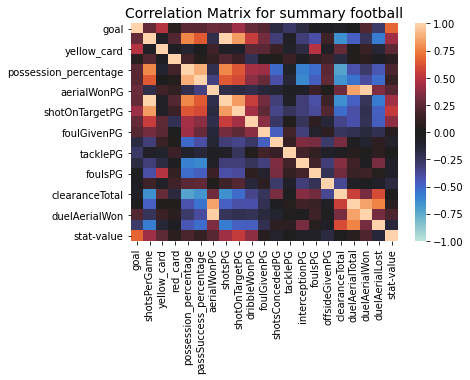

In [46]:
# First correlation matrix for the data in all_summary_18 dataset
dfCorr1 = pd.DataFrame(all_summary18)

corrMatrix1 = dfCorr1.corr()
ax = sns.heatmap(corrMatrix1,annot=False, vmin=-1, vmax=1, center=0)
#ax.set_ylim([0,20])
ax.set_title("Correlation Matrix for summary football", fontsize = 14)

_ = ax.set_yticklabels(
    ax.get_yticklabels(),
    rotation=0,
    horizontalalignment='right')

plt.savefig("Correlation Matrix for summary football.png")




Text(0.5, 1.0, 'Correlation Matrix for pass football')

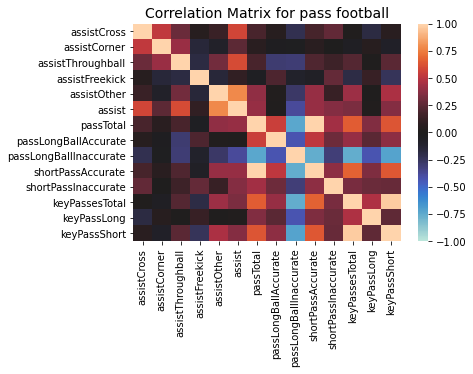

In [47]:
# Second correlation matrix for the data in all_pass18 dataset
dfCorr2 = pd.DataFrame(all_pass18)

corrMatrix2 = dfCorr2.corr()
ax = sns.heatmap(corrMatrix2,annot=False, vmin=-1, vmax=1, center=0)
#ax.set_ylim([0,20])
ax.set_title("Correlation Matrix for pass football", fontsize = 14)

plt.savefig("Correlation Matrix for pass football.png")


## Box Plot of Shots Per Game

[]

(1.0, 10.0)

Text(0.5, 0, 'Number of Shots Per Game')

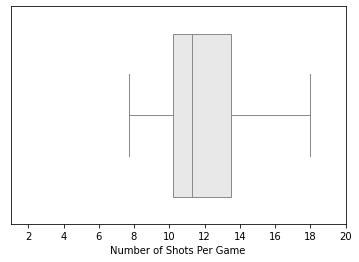

In [48]:
shotspergame = sns.boxplot(
    x = "shotsPerGame", 
    data = all_football_18,  
    color = "#E8E8E8", 
    linewidth=1, 
    width=0.75,
    flierprops = {"marker": 'o', 
                  "markerfacecolor": '#6082B6', 
                  "markersize": 3, 
                  "markeredgecolor": '#6082B6'}
)
shotspergame.set_yticks([])
shotspergame.set_xlim([1,10])
_ = shotspergame.set_xticks([2,4,6,8,10,12,14,16,18,20])
shotspergame.set_xlabel("Number of Shots Per Game")


plt.savefig("Box Plot of Shots Per Game.png")